# Language Classification

---
    
| ⚡ Description: Work Structure ⚡ |
| :--------------------------- |
| This skeleton was adapted from one in Regression Predict |



<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Feature Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a href=#eight>8. Conclusion</a>

<a href=#nine>9. Recommendation</a>

<a href=#ten>10. Acknowlodgement </a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    

---

In [198]:
import numpy as np
import pandas as pd

#libraries for NLP and text preprocessing
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import  word_tokenize
import string 

from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, confusion_matrix,classification_report, ConfusionMatrixDisplay

In [199]:
##Source is Analytics Vidya
import os
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier 
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC


In [8]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [58]:
#libraries for visualisation 
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
# set plot style
sns.set()

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    


---

In [176]:
df_train_set = pd.read_csv("train_set.csv")
df_test_set = pd.read_csv("test_set.csv")

In [177]:
df_train_set.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [178]:
df_test_set.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [180]:
def eda (df):
    shape = df.shape
    null_entries = df.isnull().sum()
    dist_lang_id = list(df.lang_id.unique())
    duplicate = df.columns.duplicated().any()
    
    # summary
    a = print ('Shape of dataframe is ' + str(shape[0]) + ' rows and ' + str(shape[1]) + ' columns')
    b = print ('Unique ids are: ' +  str(dist_lang_id))
    c = print ('Duplicate entries: ', duplicate)
    d = print ('Checking for null entries in each column:\n' ,null_entries)
    
    return a,b,c,d



In [182]:
eda(df_train_set)

Shape of dataframe is 33000 rows and 2 columns
Unique ids are: ['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']
Duplicate entries:  False
Checking for null entries in each column:
 lang_id    0
text       0
dtype: int64


(None, None, None, None)

In [183]:
#Graphical EDA (wordcloud)
def word_cloud (df, column_name):
    wc = WordCloud()
    text = df[column_name].values
    msg_cloud = wc.generate(str(text))
    
    #plot wordcloud
    fig,ax = plt.subplots(figsize=(10,10))
    ax.plot
    plt.imshow(msg_cloud)
    plt.axis('off')
    plt.show
    
    return wc

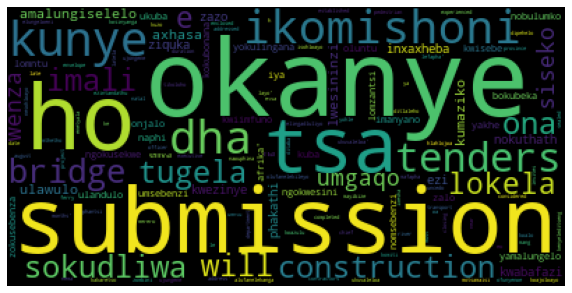

In [184]:
word_cloud (df_train_set, 'text')

In [187]:
#Graphical EDA (bar graphs), for the target variable
def bar_graph(df, column_name):
    bar = df[column_name].value_counts().plot(kind = 'bar')
    plt.show()
    return bar

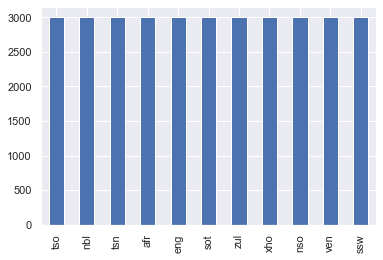

In [188]:
bar_graph(df_train_set, 'lang_id')

In [ ]:
##Above target data is balanced 

<a id="four"></a>
## 4. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
---

In [189]:
def punc_removal(t):
    clean_string = t.translate(str.maketrans('', '', string.punctuation))
    return clean_string

In [235]:
def preprocess(df, frame_type="train"):
    ##Just checking if function is running as should
    print("lendf")
    print(len(df))
    ## Copy df to avoid editing original
    input_df = df.copy(deep=True)
    ##Column of interest
    column_name = 'text' 
    ##Remove punctuation
    df[column_name] = df[column_name].apply(punc_removal)
    #remove single numeric terms
    numeric_terms = r'[0-9]' 
    df[column_name] = df[column_name].replace(to_replace = numeric_terms, value = '', regex = True)
    ##Drop unwanted columns depending if train or test
    if frame_type == "train":
        input_df.drop(['lang_id'], axis = 1, inplace = True)
    else:
        input_df.drop(['index'], axis = 1, inplace = True)
    return input_df

In [236]:
clean_train_set = preprocess(df_train_set)
clean_test_set =   preprocess(df_test_set,'test')

lendf
33000
lendf
5682


In [237]:
##Make tokenizer callable
def wordd_tokenizer(text):
    return word_tokenize(text)

In [239]:
##Vectorize with Word tokenizer
vect = TfidfVectorizer(stop_words='english', tokenizer=wordd_tokenizer,analyzer='char', ngram_range=(1, 5))
X_vect_train = vect.fit_transform(clean_train_set['text'])
X_vect_text = vect.transform(clean_test_set['text'])
y =df_train_set['lang_id']

In [223]:
SEED = 1

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X_vect_train,y , test_size=0.3, random_state = SEED)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more classification models that is/are able to classify whether or not a person believes in climate change, based on their novel tweet data.

---

In [240]:

clf_sdg = SGDClassifier(loss="hinge", penalty="l2", max_iter=10)
clf_lnsvc = LinearSVC()
clf_logis=LogisticRegression(random_state=SEED)
clf_gau = GaussianNB()
clf_mult = MultinomialNB()
clf_mult2 = MultinomialNB(fit_prior=False)
clf_kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
clf_kneigbors = KNeighborsClassifier(n_neighbors=20,weights='distance')
clf_svc = SVC()
clf_rf = RandomForestClassifier()
clf_ada = AdaBoostClassifier(base_estimator=clf_sdg)
##SVC and gaussian gave memory error hence were not evealuated
##clf_mult was the same as clf_mult2 

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [241]:
##Evaluater to see how models work and display testst
def evaluate(model,X_train,y_train, X_test, y_test):
    # model.fit(X_train, y_train )
    # y_pred = model.predict(X_test)
    try: 
        model.fit(X_train, y_train )
        y_pred = model.predict(X_test)
    except:
        try:
            model.fit(X_train.toarray(), y_train )
            y_pred = model.predict(X_test.toarray())
        except:
            print(sys.exc_info())
            return -1
    model_name = model.__class__.__name__ 
    print("================================="+model_name+"=================================================")
    print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
    print('\n')
    print(f'Confusion matrix score: {confusion_matrix(y_test, y_pred)}')
    print('\n')
    print("Classification")
    print(f'{classification_report(y_test, y_pred)}')
    print(f'Precision : {precision_score(y_test, y_pred,average=None )}')

In [226]:
evaluate(clf_mult2,X_train,y_train, X_test, y_test)

=================================MultinomialNB=================================================
Accuracy score: 0.9994949494949495


Confusion matrix score: [[905   0   0   0   0   0   0   0   0   0   0]
 [  0 848   0   0   0   0   0   0   0   0   0]
 [  0   0 916   0   0   0   0   0   0   0   0]
 [  0   0   0 903   0   0   1   0   0   0   0]
 [  0   0   0   0 879   0   0   0   0   0   0]
 [  0   0   0   0   0 945   0   0   0   0   0]
 [  0   0   0   0   0   0 889   0   0   0   0]
 [  0   0   0   0   0   0   0 852   0   0   0]
 [  0   0   0   0   0   0   0   0 934   0   0]
 [  0   1   1   0   0   0   0   0   0 922   2]
 [  0   0   0   0   0   0   0   0   0   0 902]]


Classification
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       905
         eng       1.00      1.00      1.00       848
         nbl       1.00      1.00      1.00       916
         nso       1.00      1.00      1.00       904
         sot       1.00      1.00    

In [204]:
evaluate(clf_rf,X_train,y_train, X_test, y_test)

=================================RandomForestClassifier=================================================
Accuracy score: 0.982020202020202


Confusion matrix score: [[904   1   0   0   0   0   0   0   0   0   0]
 [  3 845   0   0   0   0   0   0   0   0   0]
 [  0  11 870   0   0   2   0   0   0   5  28]
 [  0   1   0 898   1   0   4   0   0   0   0]
 [  0   0   0   0 878   0   1   0   0   0   0]
 [  1  19   3   0   0 899   0   1   0   1  21]
 [  0   0   0   2   0   0 887   0   0   0   0]
 [  0   0   0   0   0   0   0 852   0   0   0]
 [  0   0   0   0   0   0   0   0 934   0   0]
 [  1  11   6   0   0   0   0   0   0 897  11]
 [  0  13  12   1   0   7   0   0   0  11 858]]


Classification
              precision    recall  f1-score   support

         afr       0.99      1.00      1.00       905
         eng       0.94      1.00      0.97       848
         nbl       0.98      0.95      0.96       916
         nso       1.00      0.99      1.00       904
         sot       1.00      

In [227]:
evaluate(clf_kneigbors,X_train,y_train, X_test, y_test)

=================================KNeighborsClassifier=================================================
Accuracy score: 0.9908080808080808


Confusion matrix score: [[904   0   0   0   0   0   0   0   0   0   1]
 [  0 848   0   0   0   0   0   0   0   0   0]
 [  0   1 909   0   0   0   0   0   0   1   5]
 [  0   0   0 900   1   0   3   0   0   0   0]
 [  0   0   0   0 875   0   4   0   0   0   0]
 [  0   0   0   0   0 943   0   0   0   0   2]
 [  0   0   0   0   2   0 887   0   0   0   0]
 [  0   0   0   0   0   0   0 852   0   0   0]
 [  0   0   0   0   0   0   0   0 934   0   0]
 [  0   1  15   0   0   0   0   0   0 885  25]
 [  0   0  22   0   0   4   0   0   0   4 872]]


Classification
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       905
         eng       1.00      1.00      1.00       848
         nbl       0.96      0.99      0.98       916
         nso       1.00      1.00      1.00       904
         sot       1.00      1

In [231]:
evaluate(clf_sdg,X_train,y_train, X_test, y_test)

=================================SGDClassifier=================================================
Accuracy score: 0.9992929292929293


Confusion matrix score: [[905   0   0   0   0   0   0   0   0   0   0]
 [  0 848   0   0   0   0   0   0   0   0   0]
 [  0   0 914   0   0   0   0   0   0   0   2]
 [  0   0   0 903   0   0   1   0   0   0   0]
 [  0   0   0   0 879   0   0   0   0   0   0]
 [  0   0   0   0   0 944   0   0   0   0   1]
 [  0   0   0   0   0   0 889   0   0   0   0]
 [  0   0   0   0   0   0   0 852   0   0   0]
 [  0   0   0   0   0   0   0   0 934   0   0]
 [  0   1   1   0   0   0   0   0   0 924   0]
 [  0   0   0   0   0   0   0   0   0   1 901]]


Classification
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       905
         eng       1.00      1.00      1.00       848
         nbl       1.00      1.00      1.00       916
         nso       1.00      1.00      1.00       904
         sot       1.00      1.00    

In [206]:
evaluate(clf_logis,X_train,y_train, X_test, y_test)

D:\installation\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=================================LogisticRegression=================================================
Accuracy score: 0.9943434343434343


Confusion matrix score: [[897   2   0   0   0   2   0   0   0   4   0]
 [  0 847   0   0   0   0   1   0   0   0   0]
 [  0   0 901   0   0   1   0   0   0   4  10]
 [  0   1   0 900   0   0   3   0   0   0   0]
 [  0   0   1   1 874   0   2   0   0   1   0]
 [  0   0   0   0   0 940   0   0   0   0   5]
 [  0   0   1   1   0   0 887   0   0   0   0]
 [  0   0   0   0   0   0   0 852   0   0   0]
 [  0   0   0   0   0   0   0   0 933   1   0]
 [  0   2   1   0   0   0   0   0   0 923   0]
 [  0   0   5   0   0   1   0   0   0   6 890]]


Classification
              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       905
         eng       0.99      1.00      1.00       848
         nbl       0.99      0.98      0.99       916
         nso       1.00      1.00      1.00       904
         sot       1.00      0.9

In [95]:
evaluate(clf_lnsvc,X_train,y_train, X_test, y_test)

=================================LinearSVC=================================================
Accuracy score: 0.9978787878787879


Confusion matrix score: [[905   0   0   0   0   0   0   0   0   0   0]
 [  0 848   0   0   0   0   0   0   0   0   0]
 [  0   0 908   0   0   1   0   0   0   3   4]
 [  0   0   0 902   0   0   1   0   0   1   0]
 [  0   0   0   0 878   0   0   0   0   1   0]
 [  0   0   0   0   0 942   0   0   0   0   3]
 [  0   0   0   1   0   0 888   0   0   0   0]
 [  0   0   0   0   0   0   0 852   0   0   0]
 [  0   0   0   0   0   0   0   0 934   0   0]
 [  0   1   0   0   0   0   0   0   0 925   0]
 [  0   0   2   0   0   0   0   0   0   3 897]]


Classification
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       905
         eng       1.00      1.00      1.00       848
         nbl       1.00      0.99      0.99       916
         nso       1.00      1.00      1.00       904
         sot       1.00      1.00      1.

In [97]:
evaluate(clf_gau,X_train,y_train, X_test, y_test)

(<class 'MemoryError'>, MemoryError((23100, 145399), dtype('float64')), <traceback object at 0x00000136EBB5D1C0>)


-1

In [228]:
evaluate(clf_mult,X_train,y_train, X_test, y_test)

=================================MultinomialNB=================================================
Accuracy score: 0.9994949494949495


Confusion matrix score: [[905   0   0   0   0   0   0   0   0   0   0]
 [  0 848   0   0   0   0   0   0   0   0   0]
 [  0   0 916   0   0   0   0   0   0   0   0]
 [  0   0   0 903   0   0   1   0   0   0   0]
 [  0   0   0   0 879   0   0   0   0   0   0]
 [  0   0   0   0   0 945   0   0   0   0   0]
 [  0   0   0   0   0   0 889   0   0   0   0]
 [  0   0   0   0   0   0   0 852   0   0   0]
 [  0   0   0   0   0   0   0   0 934   0   0]
 [  0   1   1   0   0   0   0   0   0 922   2]
 [  0   0   0   0   0   0   0   0   0   0 902]]


Classification
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       905
         eng       1.00      1.00      1.00       848
         nbl       1.00      1.00      1.00       916
         nso       1.00      1.00      1.00       904
         sot       1.00      1.00    

In [209]:

def get_preds_csv(model, X_sc, y_sc, X_tst, filename):
    model.fit(X_sc, y_sc )
    y_pred = model.predict(X_tst)
    model_name = model.__class__.__name__ 
    print("================================="+model_name+"=================================================")
    print(f'Accuracy score: {model.score( X_sc, y_sc)}')
    output = pd.DataFrame({'index': df_test_set['index'], 'lang_id': y_pred})
    output.to_csv(filename+'.csv', index=False)
    
    
    

In [210]:
get_preds_csv(clf_kneigbors, X_vect_train, y, X_vect_text, "kneighb03")


=================================KNeighborsClassifier=================================================
Accuracy score: 1.0


In [234]:

get_preds_csv(clf_lnsvc, X_vect_train, y, X_vect_text, "lnsvc05")

=================================LinearSVC=================================================
Accuracy score: 1.0


In [229]:
## Best model so far 97 accuracy on kaggle
get_preds_csv(clf_mult, X_vect_train, y, X_vect_text, "multc04")

=================================MultinomialNB=================================================
Accuracy score: 0.9996969696969698


In [230]:
get_preds_csv(clf_rf, X_vect_train, y, X_vect_text, "rf02")

=================================RandomForestClassifier=================================================
Accuracy score: 1.0


In [221]:

get_preds_csv(clf_mult2, X_vect_train, y, X_vect_text, "multc201")

=================================MultinomialNB=================================================
Accuracy score: 0.9999090909090909


In [233]:

get_preds_csv(clf_sdg, X_vect_train, y, X_vect_text, "sdg02")

=================================SGDClassifier=================================================
Accuracy score: 0.9997878787878788


<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
##According to kaggle test
# The best was multinomialNb with 97% accuracy while the poorest was the randomforest classifier with 84%
##SDG and linear svc were also good second after multinomial with 95% accuracy

 <a id="eight"></a>
## 8. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

<a id="nine"></a>
## 9. Recommendation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

<a id="ten"></a>
## 10. Acknowledgement
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---